In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [2]:
results = pickle.load( open( "results_total_val.pkl", "rb" ) )
results_test = pickle.load( open( "results_total_test.pkl", "rb" ) )

In [72]:

predict_test = results_test["resnet50"]["predict"]
gt_test = results_test["resnet50"]["gt"]

Accuracy:  99.83071888048754
Precision:  99.83084125906609
Recall:  99.83071888048754
F1score:  99.83071776361632
resnet50


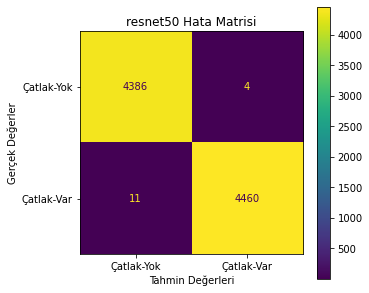

Accuracy:  99.89843132829252
Precision:  99.89855761899297
Recall:  99.89843132829252
F1score:  99.89843212521824
resnet18


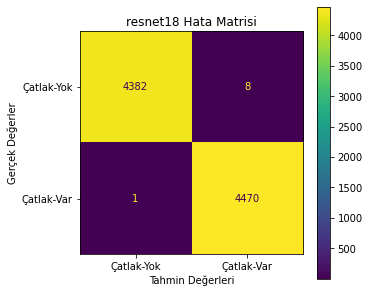

Accuracy:  98.3071888048753
Precision:  98.32813728616914
Recall:  98.3071888048753
F1score:  98.30752073252968
swin_transformer


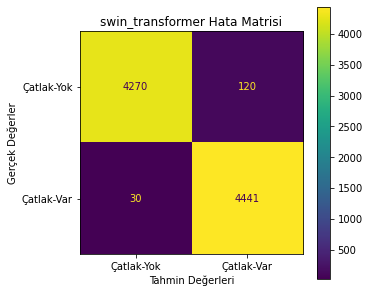

Accuracy:  96.45638189820562
Precision:  96.47820359224535
Recall:  96.45638189820562
F1score:  96.45643704922942
efficentnet


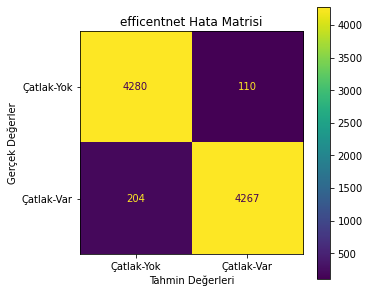

In [85]:
for key in results_test.keys():
    predict_test = results_test[key]["predict"]
    gt_test = results_test[key]["gt"]
    accuracy = accuracy_score(predict_test, gt_test)

    accuracy *= 100

    precision = precision_score(predict_test, gt_test, labels=[0, 1], average='weighted')

    precision *= 100

    recall = recall_score(predict_test, gt_test, labels=[0, 1], average='weighted')
    recall *= 100

    f1score = f1_score(predict_test, gt_test, labels=[0, 1], average='weighted')
    f1score *= 100

    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1score: ", f1score)


    cm = confusion_matrix(gt_test, predict_test, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=["Çatlak-Yok","Çatlak-Var"])
    print(key)
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlabel('Tahmin Değerleri');ax.set_ylabel('Gerçek Değerler'); 
    disp.plot(ax=ax,values_format = '')
    disp.ax_.set(
                title=f'{key} Hata Matrisi', 
                xlabel='Tahmin Değerleri', 
                ylabel='Gerçek Değerler')
    plt.show()

Accuracy:  60.415553180117584
Precision:  82.71753395690202
Recall:  60.415553180117584
F1score:  65.3563769044097


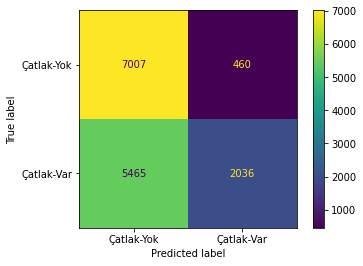

Accuracy:  61.3174772848744
Precision:  75.9268519539452
Recall:  61.3174772848744
F1score:  64.34680712341203


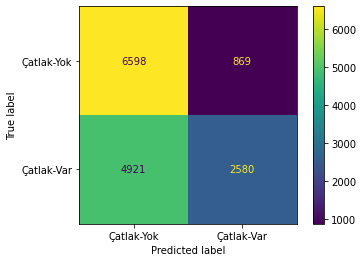

Accuracy:  53.99518973810796
Precision:  57.91014052017326
Recall:  53.99518973810796
F1score:  54.905164082908975


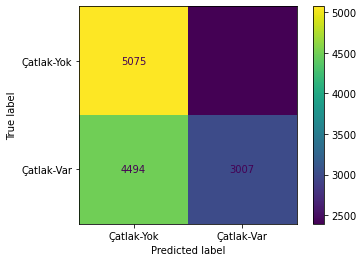

Accuracy:  53.70791020844469
Precision:  55.75174421809977
Recall:  53.70791020844469
F1score:  54.179893879749805


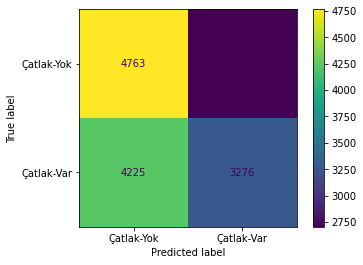

In [79]:
for key in results.keys():
    predict = results[key]["predict"]
    gt = results[key]["gt"]
    accuracy = accuracy_score(predict, gt)

    accuracy *= 100

    precision = precision_score(predict, gt, labels=[0, 1], average='weighted')

    precision *= 100

    recall = recall_score(predict, gt, labels=[0, 1], average='weighted')
    recall *= 100

    f1score = f1_score(predict, gt, labels=[0, 1], average='weighted')
    f1score *= 100

    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1score: ", f1score)


    cm = confusion_matrix(gt, predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=["Çatlak-Yok","Çatlak-Var"])

    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlabel('Tahmin Değerleri');ax.set_ylabel('Gerçek Değerler'); 
    disp.plot(ax=ax,values_format = '')
    disp.ax_.set(
                title=f'{key} Hata Matrisi', 
                xlabel='Tahmin Değerleri', 
                ylabel='Gerçek Değerler')
    plt.show()

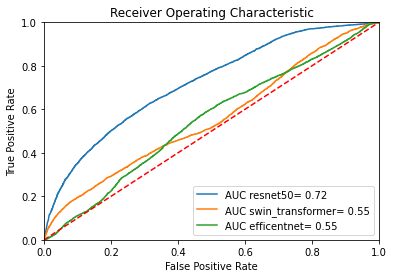

In [12]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

results = pickle.load( open( "results_total_val_s.pkl", "rb" ) )
results_test = pickle.load( open( "results_total_test_s.pkl", "rb" ) )
key = "resnet50"

for key in results.keys():
    if key == "resnet18": continue
    preds = results[key]["scores"]
    y_test = results[key]["gt"]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    
    roc_auc = metrics.auc(fpr, tpr)
    # method I: plt
    plt.plot(fpr, tpr, label = f'AUC {key}= %0.2f' % roc_auc)
    pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [6]:
results

{'resnet50': {'predict': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
  'scores': array([9.1575541e-02, 5.8972333e-02, 4.5339557e-06, ..., 5.8964954e-04,
         4.8516734e-04, 1.3185071e-02], dtype=float32),
  'gt': array([0, 0, 0, ..., 1, 0, 1], dtype=int64)},
 'resnet18': {'predict': array([1, 0, 1, ..., 0, 0, 1], dtype=int64),
  'scores': array([9.9952686e-01, 8.0987178e-05, 9.9984264e-01, ..., 3.2322583e-05,
         3.7544029e-05, 8.1540549e-01], dtype=float32),
  'gt': array([1, 1, 1, ..., 0, 1, 1], dtype=int64)},
 'swin_transformer': {'predict': array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
  'scores': array([7.7395153e-04, 1.8504550e-01, 4.8036778e-01, ..., 8.5257548e-01,
         7.8719284e-04, 9.7987235e-01], dtype=float32),
  'gt': array([0, 0, 1, ..., 1, 1, 0], dtype=int64)},
 'efficentnet': {'predict': array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
  'scores': array([0.03854796, 0.02807654, 0.02144224, ..., 0.8796786 , 0.96995723,
         0.67071915], dtype=float32),
  'gt